## Sales Trend Analysis

#### Setup and Import

In [11]:
# === Step 1: Import Libraries ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings("ignore")

# Set plot style
sns.set(style='whitegrid', palette='muted')
plt.rcParams['figure.figsize'] = (12, 6)

# === Step 2: Load Cleaned Dataset ===
file_path = '/Users/mynimbus/Library/Mobile Documents/com~apple~CloudDocs/GitHub Uploads/StoreSight/0_data/cleaned_data.csv'
cleaned_data = pd.read_csv(file_path)

# === Step 3: Confirm Data Load and Structure ===
print("✅ Data Loaded Successfully\n")
print("📐 Shape:", cleaned_data.shape)
print("\n🧱 Columns:\n", cleaned_data.columns.tolist())
print("\n🔎 Sample Records:")
display(cleaned_data.head())

✅ Data Loaded Successfully

📐 Shape: (51290, 28)

🧱 Columns:
 ['Unnamed: 0', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_ID', 'Customer_Name', 'Segment', 'City', 'State', 'Country', 'Region', 'Market', 'Product_ID', 'Category', 'Sub-Category', 'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping_Cost', 'Order_Priority', 'Returned', 'Shipping_Delay_Days', 'Profit_Margin', 'Total_Order_Value', 'Is_Returned']

🔎 Sample Records:


,Unnamed: 0,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,...,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Returned,Shipping_Delay_Days,Profit_Margin,Total_Order_Value,Is_Returned
0,0,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,...,2,0.0,62.1544,40.77,High,Unknown,2,28.00,262.75,0
1,1,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,Wollongong,New South Wales,...,9,0.1,-288.7650,923.63,Critical,Unknown,2,-7.78,4633.02,0
2,2,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,Brisbane,Queensland,...,9,0.1,919.9710,915.49,Medium,Unknown,1,17.78,6090.66,0
3,3,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,Berlin,Berlin,...,5,0.1,-96.5400,910.16,Medium,Unknown,2,-3.34,3802.67,0
4,4,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,Dakar,Dakar,...,8,0.0,311.5200,903.04,Critical,Unknown,1,11.00,3736.00,0


#### Time-Based Feature Engineering

In [12]:
# Ensure Order_Date is in datetime format
cleaned_data['Order_Date'] = pd.to_datetime(cleaned_data['Order_Date'], errors='coerce')

# Extract year
cleaned_data['Year'] = cleaned_data['Order_Date'].dt.year

# Extract month
cleaned_data['Month'] = cleaned_data['Order_Date'].dt.month

# Create 'Year-Month' column for grouping
cleaned_data['Year_Month'] = cleaned_data['Order_Date'].dt.to_period('M').astype(str)

# Optional: Weekday (0=Monday, 6=Sunday)
cleaned_data['Weekday'] = cleaned_data['Order_Date'].dt.dayofweek

# Optional: Quarter
cleaned_data['Quarter'] = cleaned_data['Order_Date'].dt.to_period('Q').astype(str)

# Confirm the new columns
print("🆕 Added Time-Based Features:")
display(cleaned_data[['Order_Date', 'Year', 'Month', 'Year_Month', 'Weekday', 'Quarter']].head())

🆕 Added Time-Based Features:


,Order_Date,Year,Month,Year_Month,Weekday,Quarter
0,2014-11-11,2014,11,2014-11,1,2014Q4
1,2014-02-05,2014,2,2014-02,2,2014Q1
2,2014-10-17,2014,10,2014-10,4,2014Q4
3,2014-01-28,2014,1,2014-01,1,2014Q1
4,2014-11-05,2014,11,2014-11,2,2014Q4


#### Overall Monthly Sales Trend Analysis

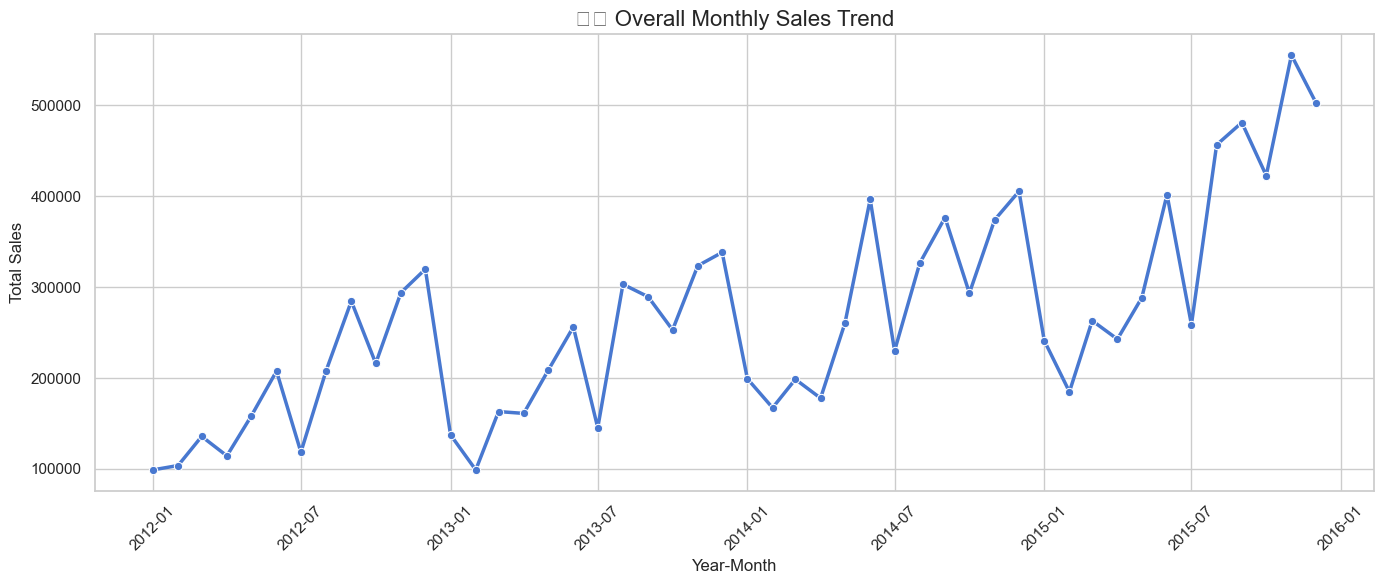

In [13]:
# === Step 1: Aggregate Monthly Sales ===
monthly_sales = cleaned_data.groupby('Year_Month')['Sales'].sum().reset_index()

# Ensure correct order of months
monthly_sales['Year_Month'] = pd.to_datetime(monthly_sales['Year_Month'])

# Sort by date just in case
monthly_sales = monthly_sales.sort_values('Year_Month')

# === Step 2: Line Plot ===
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_sales, x='Year_Month', y='Sales', marker='o', linewidth=2.5)

plt.title('🗓️ Overall Monthly Sales Trend', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Sales Trends by Segment, Region, and Category

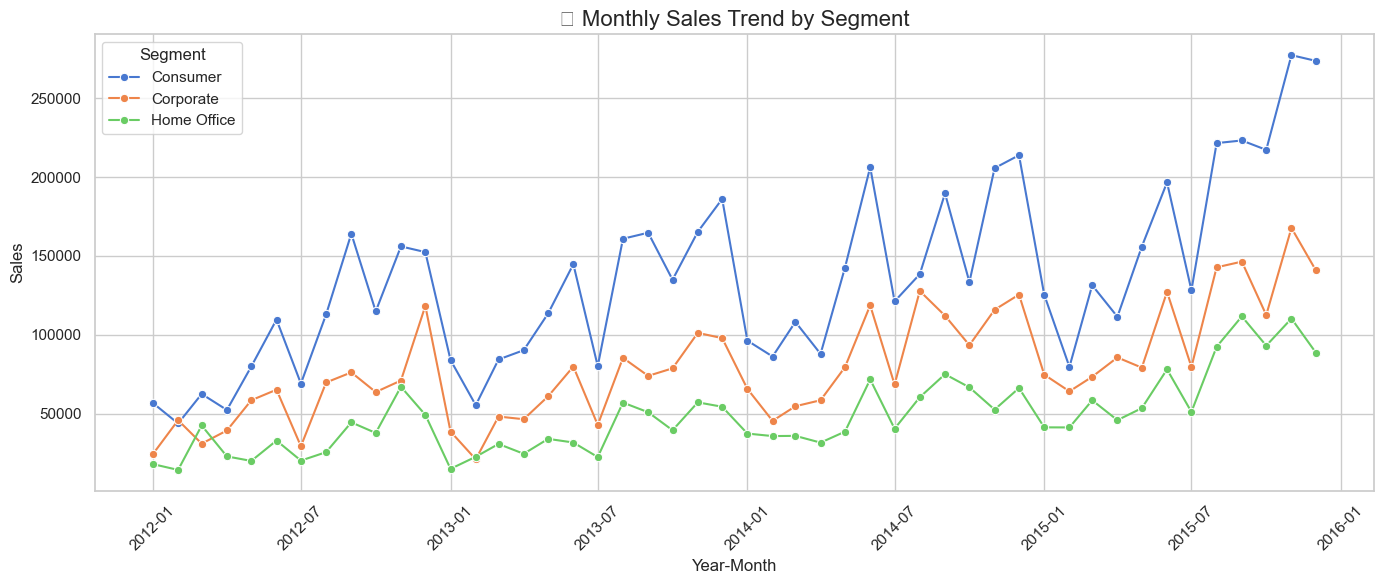

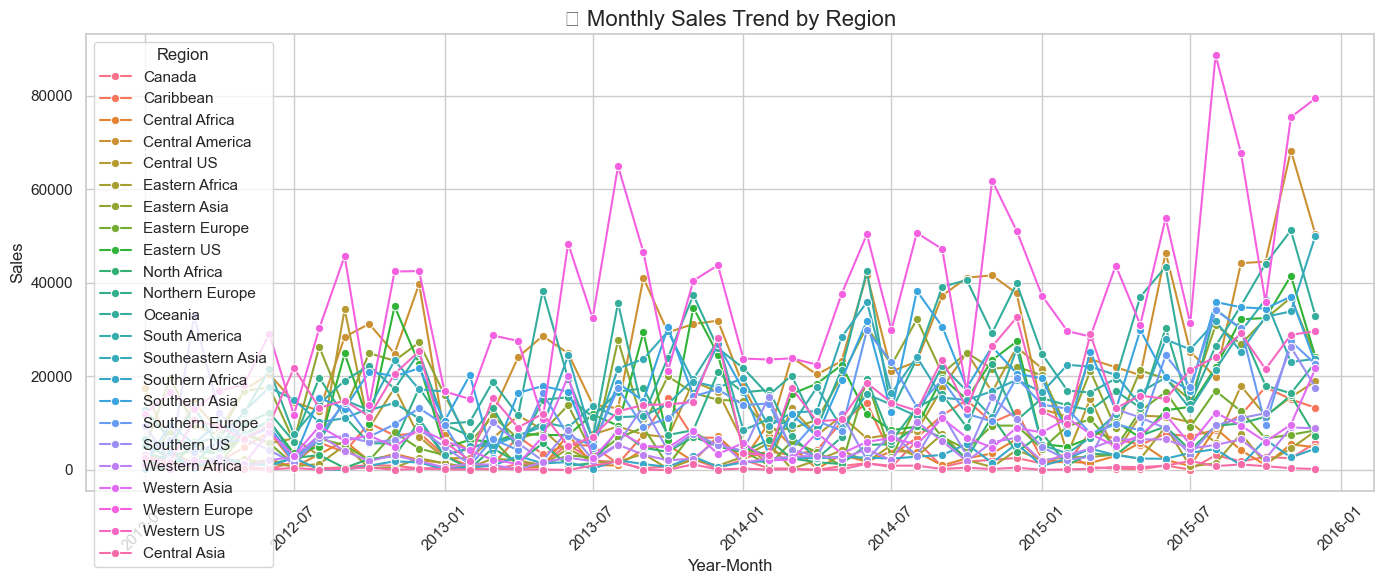

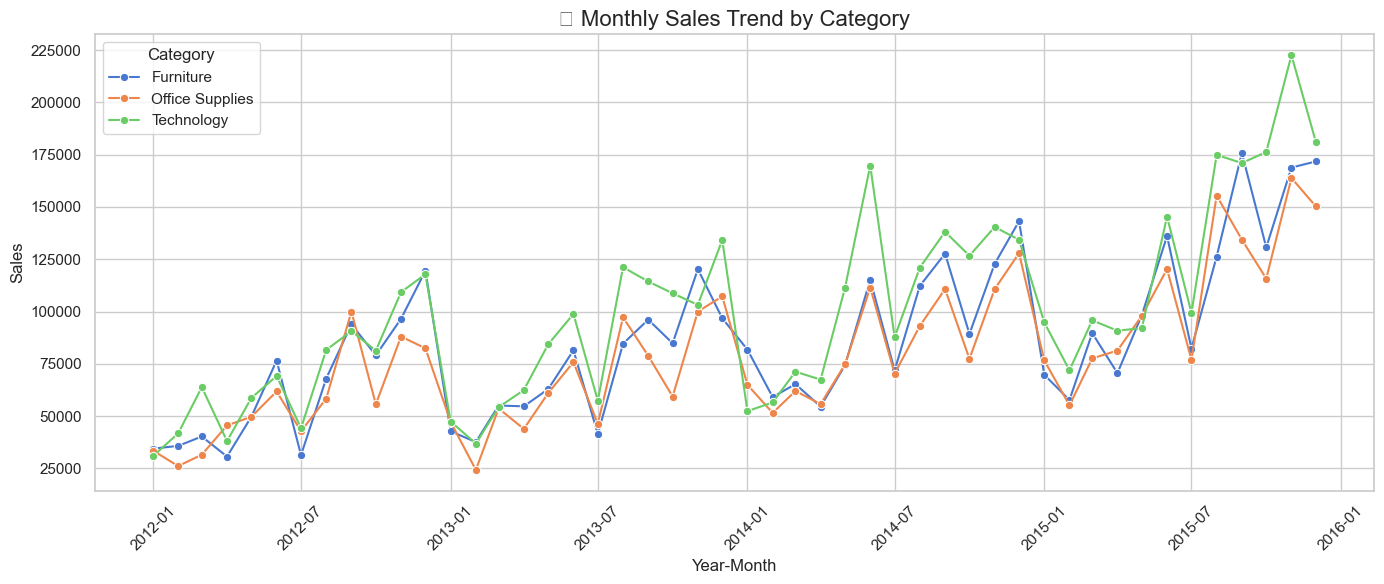

In [17]:
# Ensure Year_Month is in datetime format (just in case)
cleaned_data['Year_Month'] = pd.to_datetime(cleaned_data['Year_Month'])

# 1️⃣ Sales Trend by Segment
segment_sales = cleaned_data.groupby(['Year_Month', 'Segment'])['Sales'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=segment_sales, x='Year_Month', y='Sales', hue='Segment', marker='o')
plt.title('📊 Monthly Sales Trend by Segment', fontsize=16)
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 2️⃣ Sales Trend by Region
region_sales = cleaned_data.groupby(['Year_Month', 'Region'])['Sales'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=region_sales, x='Year_Month', y='Sales', hue='Region', marker='o')
plt.title('🌍 Monthly Sales Trend by Region', fontsize=16)
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 3️⃣ Sales Trend by Category
category_sales = cleaned_data.groupby(['Year_Month', 'Category'])['Sales'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=category_sales, x='Year_Month', y='Sales', hue='Category', marker='o')
plt.title('📦 Monthly Sales Trend by Category', fontsize=16)
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Year-over-Year (YoY) Monthly Sales Comparison

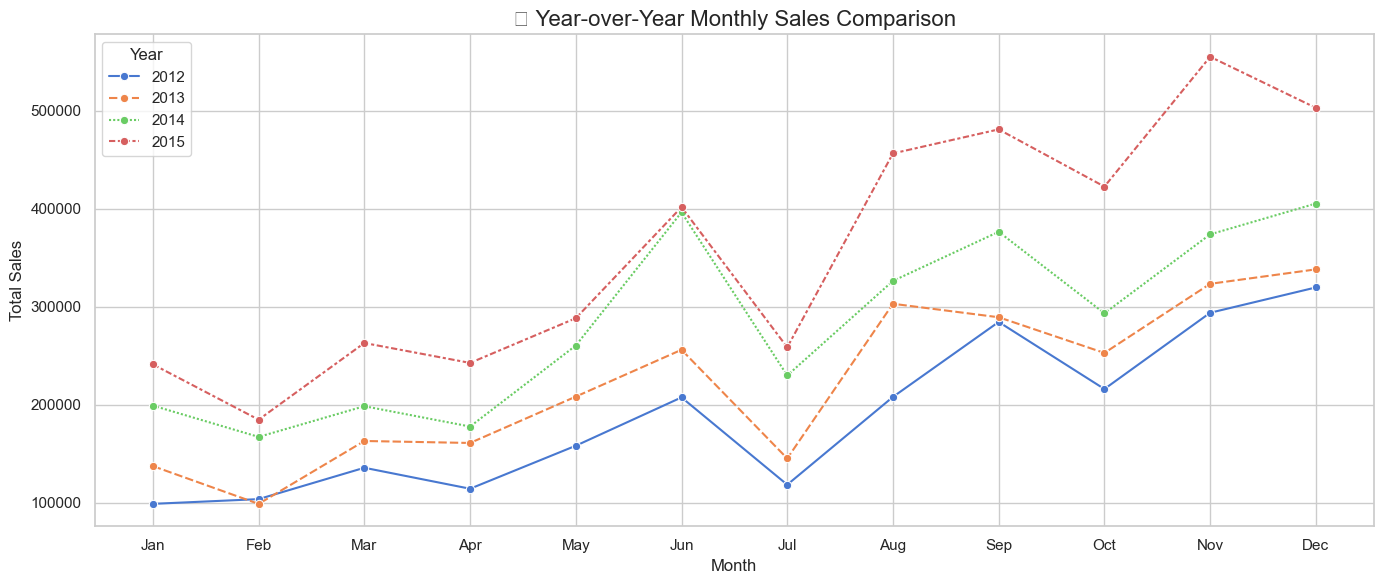

In [18]:
# Step 1: Extract Month Number and Name
cleaned_data['Month_Name'] = cleaned_data['Order_Date'].dt.strftime('%b')  # e.g., Jan, Feb
cleaned_data['Month_Num'] = cleaned_data['Order_Date'].dt.month

# Step 2: Group by Year and Month
yoy_data = (
    cleaned_data.groupby(['Year', 'Month_Num', 'Month_Name'])['Sales']
    .sum()
    .reset_index()
    .sort_values(by='Month_Num')
)

# Step 3: Pivot table so that each Year is a column
yoy_pivot = yoy_data.pivot(index='Month_Name', columns='Year', values='Sales')

# Ensure month order is correct
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
yoy_pivot = yoy_pivot.reindex(month_order)

# Step 4: Line Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=yoy_pivot, marker='o')

plt.title("📈 Year-over-Year Monthly Sales Comparison", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.legend(title='Year')
plt.tight_layout()
plt.show()

#### Seasonality Decomposition 

Why Use Seasonal Decomposition?
- To separate long-term business growth from seasonal buying behavior
- To prepare data for forecasting models
- To better understand when and why sales rise or fall


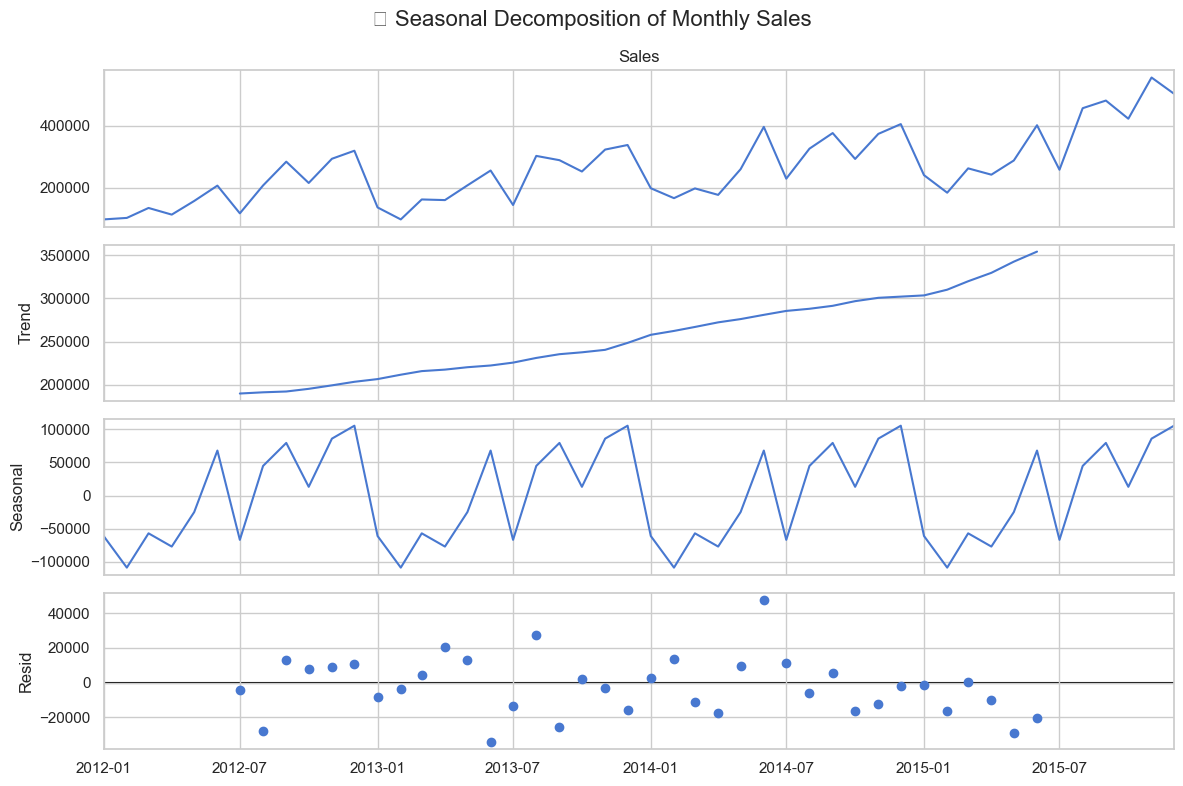

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Step 1: Prepare Monthly Sales Time Series
monthly_sales = cleaned_data.groupby('Year_Month')['Sales'].sum()
monthly_sales.index = pd.to_datetime(monthly_sales.index)
monthly_sales = monthly_sales.sort_index()

# Step 2: Decompose the time series (additive is default)
decomposition = seasonal_decompose(monthly_sales, model='additive', period=12)

# Step 3: Plot the components
plt.rcParams.update({'figure.figsize': (12, 8)})
decomposition.plot()
plt.suptitle('🧩 Seasonal Decomposition of Monthly Sales', fontsize=16)
plt.tight_layout()
plt.show()

##### 1. Trend
- Shows the long-term direction of your data — whether it’s increasing, decreasing, or flat.
- Think of this as the overall path your sales are taking over months or years.
##### 2. Seasonality
- Repeating, predictable patterns at fixed intervals (like months or quarters).
- Shows how your sales typically rise or fall during specific months every year.
##### 3. Residual (Noise)
- What’s left over after removing trend and seasonality.
- Represents irregular, unexpected events — such as promotions, economic events, or random spikes/dips.

#### Top-Performing Time Windows

To Identify:
- The months with the highest total sales
- The top-performing Year-Months
- Business opportunities for seasonal marketing or inventory planning
- Optionally, break them down by Region, Segment, or Category

Top 10 Months by Sales

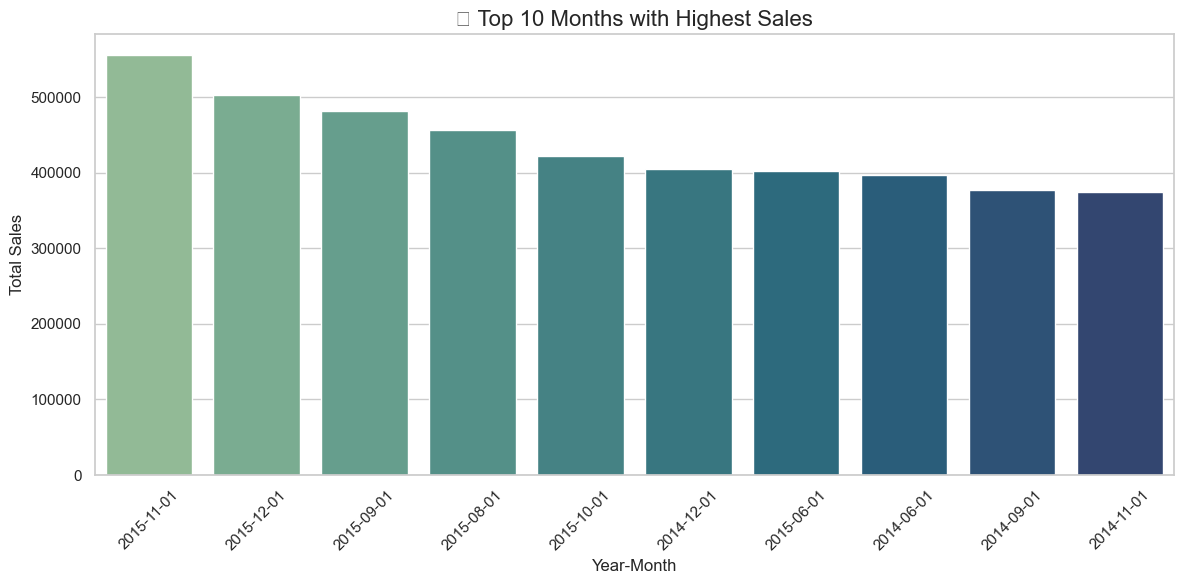

🗓️ Top 10 Performing Months by Total Sales:


,Year_Month,Sales
46,2015-11-01,555279.02700
47,2015-12-01,503143.69348
44,2015-09-01,481157.24370
43,2015-08-01,456619.94236
45,2015-10-01,422766.62916
35,2014-12-01,405454.37802
41,2015-06-01,401814.06310
29,2014-06-01,396519.61190
32,2014-09-01,376619.24568
34,2014-11-01,373989.36010


In [25]:
# Step 1: Group by Year-Month and get total sales
monthly_sales = (
    cleaned_data.groupby('Year_Month')['Sales']
    .sum()
    .reset_index()
    .sort_values(by='Sales', ascending=False)
)

# Step 2: Top 10 highest sales months
top_months = monthly_sales.head(10)

# Step 3: Plot the Top 10 Months
plt.figure(figsize=(12, 6))
sns.barplot(data=top_months, x='Year_Month', y='Sales', palette='crest')
plt.title('🏆 Top 10 Months with Highest Sales', fontsize=16)
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display top months
print("🗓️ Top 10 Performing Months by Total Sales:")
display(top_months)

Top Months by Region / Segment / Category

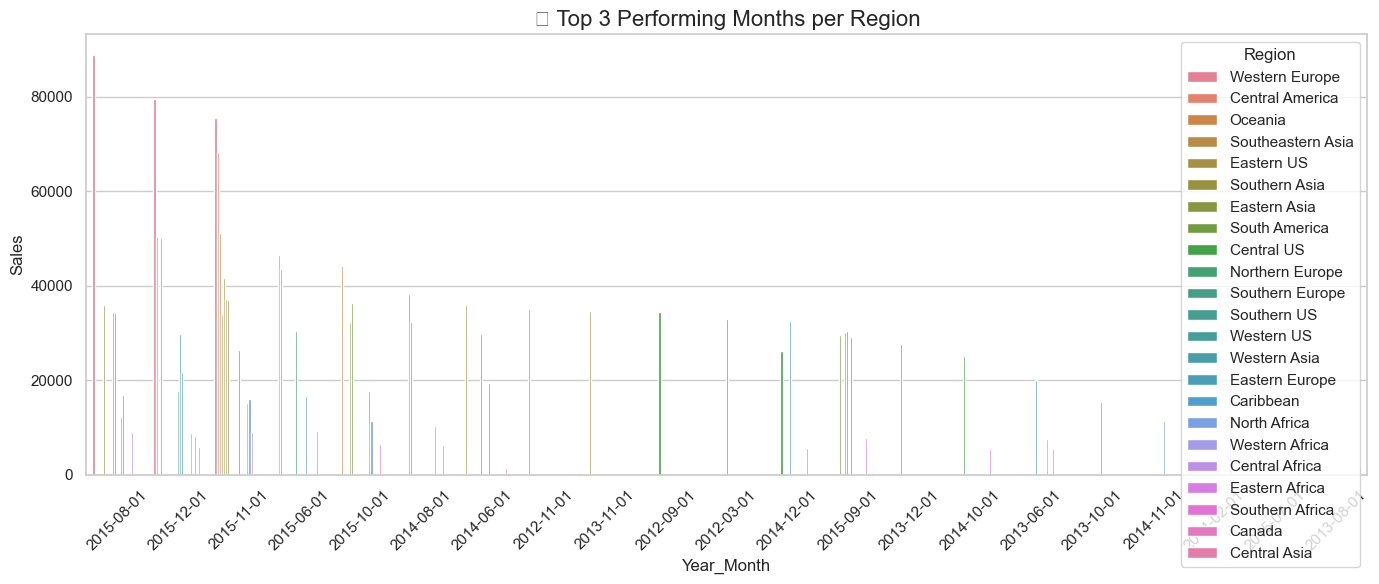

,Year_Month,Region,Sales
1003,2015-08-01,Western Europe,88729.13400
1095,2015-12-01,Western Europe,79487.78550
1072,2015-11-01,Western Europe,75451.61400
1054,2015-11-01,Central America,68307.69456
1063,2015-11-01,Oceania,51232.27500
...,...,...,...
767,2014-10-01,Southern Africa,5542.89000
385,2013-06-01,Canada,5458.38000
963,2015-07-01,Central Asia,1930.63800
434,2013-08-01,Central Asia,1862.04000


In [27]:
top_by_region = (
    cleaned_data.groupby(['Year_Month', 'Region'])['Sales']
    .sum()
    .reset_index()
    .sort_values('Sales', ascending=False)
    .groupby('Region')
    .head(3)  # Top 3 months for each region
)

plt.figure(figsize=(14, 6))
sns.barplot(data=top_by_region, x='Year_Month', y='Sales', hue='Region')
plt.title('📍 Top 3 Performing Months per Region', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

display(top_by_region)

## 📊 Key Insights from Sales Trend Analysis

### 1. Overall Growth
- There is a **steady upward trend** in monthly sales over the 4-year period.
- **Sales peaked in November 2015**, crossing **$550,000**, indicating a strong seasonal effect.

### 2. Monthly Fluctuations
- Despite growth, **sales vary month-to-month**, with visible short-term volatility.
- **February and April** tend to show **weaker sales**, likely due to post-holiday slumps or seasonal cycles.

### 3. Segment Performance
- **Consumer segment** consistently contributes the highest monthly sales.
- **Corporate and Home Office segments** show lower but more stable sales across the years.

### 4. Regional Trends
- **US region** is the largest contributor to overall sales.
- **EMEA and APAC** regions show seasonal spikes, particularly in Q4, but less consistent growth.

### 5. Category Trends
- **Technology** dominates with the highest monthly sales trend.
- **Office Supplies** and **Furniture** show moderate and more stable sales.

### 6. Seasonality
- **Sales consistently spike in November and December**, suggesting strong holiday-driven demand.
- The seasonal component confirms a **repeatable upward pattern** in Q4 across multiple years.

### 7. Top-Performing Months
- The **Top 10 months** by total sales all fall within **Q4**, especially **November and December**.
- This confirms Q4 as the most critical quarter for revenue performance.

---

## 🧠 Recommendations

### 📅 Plan Seasonally
- **Allocate more budget and inventory** toward Q4 (esp. November).
- **Launch promotions and campaigns** ahead of seasonal peaks (October onwards).

### 🎯 Target Segments
- Focus more on the **Consumer segment** with tailored offerings.
- Explore **up-selling and cross-selling** in high-performing segments during peak months.

### 🌍 Regional Expansion
- **Strengthen presence in US**, while investing in marketing in **APAC and EMEA** during their local festive seasons.

### 📦 Optimize Inventory
- Ensure **Technology category stock** is optimized for Q4.
- For lower-performing months (Feb, Apr), **consider discounting or clearance strategies**.